<center> <img src="pics/logo.jpg">

### <center> __CycleGAN: Image2Image__ <br/> 
<br/><br/>
 <center>  <img src="pics/cycle-gan-paintings.png">

#### <center><font size="6"> Атабек Дулат - *Machine Learning Engineer* в Kolesa Group</font> </center>
<br><br>
 <center><font size="6"> Гитхаб с презентацией и кодом обучения сетки : </font> </center> 
<br><br>
 <center><font size="6"> https://github.com/carnotaur/CycleGAN </font> 

# <font size="6">  <center>__План:__ </font> 
<br/><br/>
<font size="7"> 
1. GANs повтор 
2. Image-to-Image translation
3. CycleGAN - в чем фишка?
4. Generator
5. PatchGAN discriminator
6. Training Details
7. Limitations of CycleGAN
</font> 

# <font size="7">  <center> Quick tour to GAN</font>

<center>  <img src="pics/gans_basic.png">

## <font size="7"> <center> Classical Adversarial Loss </font>
<br>
<font size="6"> 
<center> $ G : X → Y $<br/>
$ D_y  - Discriminator$ <br/><br/>
$L_{GAN} (G, D_Y , X, Y ) = E_{y∼p_{data} (y)} [ log D_Y (y) ] \\
\hspace{6cm} + E_{x∼p_{data}(x)} [log(1 − D_Y (G(x))]$
</font>

# <center> Image-to-Image translation
    
<center>  <img src="pics/img_translation.jpg">

# <center> CycleGAN vs Others. 
<center> (на момент выхода статьи) 
<br/><br/>
<center>  <img src="pics/gan-vs-othergans.png">

# <center> CycleGAN
<br>
 <center>  <img src="pics/teaser.jpg">

# <font size="6">  <center> Cycle Consistency </font>
<font size="6"> 
<center> $G : X → Y $ <br>
<center> $F : Y → X $ <br>
<center> $x → G(x) → F (G(x)) ≈ x$
<center>  <img src="pics/cycle-gan-idea.png">
</font> 

## <font size="7"> <center> Example </font>
<center>  <img src="pics/reconstruction.png">

<font size="6"> 
## <center> Cycle Consistency Loss: <br/>
<center> $L_{cyc} (G, F ) = E_{x∼p_{data}} (x) [||F (G(x)) − x||_1 ]
+ E_{y∼p_{data}} (y) [||G(F (y)) − y||_1 ]$
</font> 


<font size="6"> 
## <center> Total GAN loss: <br/>

<center> $ L(G, F, D_X , D_Y ) =L_{GAN} (G, D_Y , X, Y ) + L_{GAN} (F, D_X , Y, X)
+ λL_{cyc} (G, F )$
 </font> 

<center>  <img src="pics/cycleloss-comparison.png">

<font size="7"> 
## <center> Identity Loss </center>
</font> 
<font size="6"> 
<br>
<center> Используется для сохранения цветов при Style Transferring </center>
<br>
<center> $L_{identity} (G, F ) = E_{y∼p_{data}(y)}  [||G(y) − y||_1 ] +
E_{x∼p_{data}(x)} [||F (x) − x||_1 ]$
</font size="6"> 

<center>  <img src="pics/identity-loss-comparison.png">

# <font size="7"> <center> Generator

<center>  <img src="pics/GeneratorArchitecture.jpg">

!CODE

# <font size="7">  <center> Discriminator a.k.a PatchGAN

<center>  <img src="pics/pathcgan.png">

<center>  <img src="pics/discriminator.jpg">

!CODE

# <font size="7"> <center> Training Details </font> 
<br> <br> 
<font size="5"> 
> <center> 
    Training GANs consists in finding a Nash equilibrium to a two-player non-cooperative game. […] Unfortunately, finding Nash equilibria is a very difficult problem. 
    </center> <br><br>
> <center>
But with a GAN, every step taken down the hill changes the entire landscape a little. It’s a dynamic system where the optimization process is seeking not a minimum, but an equilibrium between two forces.
    </center>
</font> 
    
 

## <font size="7"> <center> Adversarial Loss for CycleGAN: </font>
<br>
<font size="6">
for Generator: <br>
<center> $min \hspace{0.25cm} E_{x∼p_{data (x)}} [(D(G(x)) − 1) ^ 2 ]$ </center> 
<br>
for Discriminator: <br>
<center> $min \hspace{0.25cm} E_{y∼p data (y)} [(D(y) − 1)^2 ] + E_{x∼p data (x)}  [D(G(x))^2 ]$</center>
</font>

## <center> Hyperparameters:

In [16]:
img_size = 256    # может быть 128
num_epochs = 200
batch_size = 1
lr = 0.0002
alpha, beta = 0.5, 0.9
num_res_blocks = 6 if img_size == 128 else 9

In [ ]:
optimizer_G = torch.optim.Adam(itertools.chain(G_x.parameters(), G_y.parameters()),
                               lr=lr, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(itertools.chain(D_x.parameters(), D_y.parameters()),
                               lr=lr, betas=(0.5, 0.999))

# <center> GAN Failures

<center>  <img src="pics/GAN-faliures.png">

# <font size='7'> <center>  Reasons </font>
<font size="6">
- No spatial transformations <br>
- PatchGAN  <br>
-  !!! <br>
</font>

# Links:
1. Paper page: https://junyanz.github.io/CycleGAN/
2. tensorflow tutorial: https://hardikbansal.github.io/CycleGANBlog/ 
3. Training dataset: https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/

Спасибо за просмотр!!!


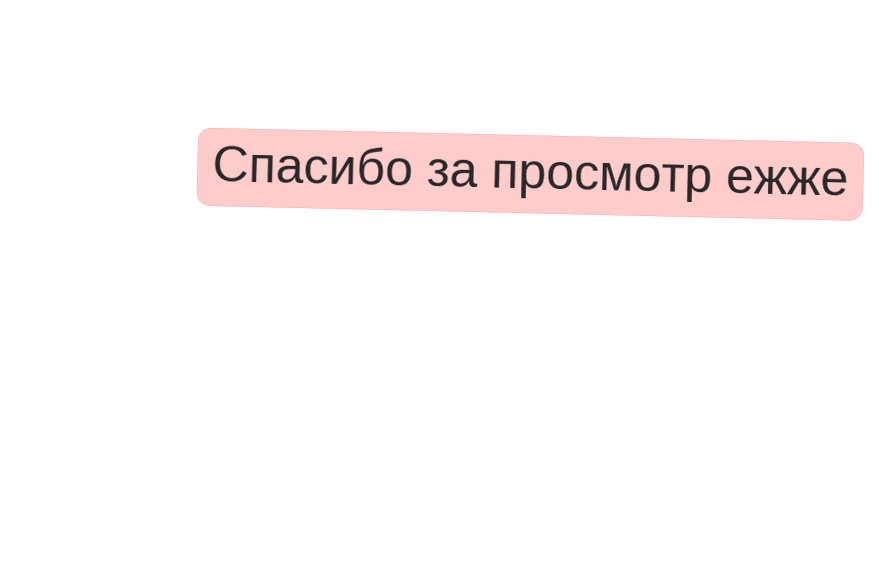

In [15]:
from utils import MakeThanks
%matplotlib inline
MakeThanks.show_thanks()